In [1]:
import time
import datetime
import torch
import random
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import scale

In [2]:
# для воспроизводимости эксперимента:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
timesample = 0.004
start_time = 1.0
end_time = 2.0
n_receivers = 80
n_timesamples = int((end_time - start_time)/timesample)

data = np.empty([1,2,n_receivers,n_timesamples])

In [4]:
n_models = 1100

for i in range(n_models):
    if (i+1) % 100 == 0:
        print(i+1,'/',n_models)
    data_Z = pd.read_csv('csv_models_2frac_alpha_Z\\model_{}.csv'.format(i+1))
    model_gather_Z = np.array(data_Z[data_Z.columns[int(start_time/timesample):int(end_time/timesample)]])
    
    data_X = pd.read_csv('csv_models_2frac_alpha_X\\model_{}.csv'.format(i+1))
    model_gather_X = np.array(data_X[data_X.columns[int(start_time/timesample):int(end_time/timesample)]])
    
    model_gather = np.vstack(([model_gather_Z],[model_gather_X]))
    model_gather = np.reshape(model_gather,(1,2,n_receivers,n_timesamples))
    
    data = np.vstack((data,model_gather))
    
data = data[1:]

100 / 1100
200 / 1100
300 / 1100
400 / 1100
500 / 1100
600 / 1100
700 / 1100
800 / 1100
900 / 1100
1000 / 1100
1100 / 1100


In [5]:
print(data.shape)
print(data[0])

(1100, 2, 80, 250)
[[[ 6.00425526e-04  7.64128286e-04  9.87617997e-04 ...  1.64378580e-05
    3.00668762e-05  4.59802541e-05]
  [ 6.00971980e-04  7.67004909e-04  9.94869741e-04 ...  4.35882885e-06
    2.29433499e-05  3.73408984e-05]
  [ 5.96781028e-04  7.62254698e-04  9.91577515e-04 ... -8.27714484e-06
    6.13496650e-06  2.90265161e-05]
  ...
  [ 6.69868405e-06  3.40749975e-05  5.91575081e-05 ...  1.38594653e-03
    4.35200334e-03  2.44726450e-03]
  [-1.00837409e-04 -1.42680568e-04 -2.04633834e-04 ... -3.04546813e-03
   -4.35450673e-03 -5.75784594e-04]
  [-3.38158803e-04 -5.13372943e-04 -6.11619325e-04 ...  4.29606065e-03
    1.86009053e-03 -3.10195098e-03]]

 [[ 6.58548670e-05  7.66966550e-05  8.42507143e-05 ...  9.30608512e-05
    8.02829891e-05  1.58654206e-04]
  [ 4.44589678e-05  4.34591057e-05  5.63968788e-05 ...  9.02201136e-05
    9.39302263e-05  9.83836508e-05]
  [ 3.09931784e-05  3.46970628e-05  3.40215920e-05 ... -1.50663636e-05
    6.80072844e-05  1.75586581e-04]
  ...
  [ 

In [6]:
# центрирование и нормализация данных
for i in range(n_models):
    for j in range(2):
        data[i,j] = scale(data[i,j], axis=1)

print(data[0])

[[[ 1.49327441e-02  1.92236371e-02  2.50816351e-02 ... -3.74441944e-04
   -1.72050893e-05  3.99908232e-04]
  [ 1.56849127e-02  2.01721246e-02  2.63304078e-02 ... -4.39175868e-04
    6.30900687e-05  4.52198734e-04]
  [ 1.64192237e-02  2.10843991e-02  2.75496644e-02 ... -6.39094663e-04
   -2.32776074e-04  4.12602103e-04]
  ...
  [ 4.86122406e-05  1.06303874e-03  1.99246861e-03 ...  5.11565001e-02
    1.61063432e-01  9.04835294e-02]
  [-2.63891816e-03 -4.18992549e-03 -6.48635749e-03 ... -1.11788035e-01
   -1.60310386e-01 -2.02438644e-02]
  [-1.17224201e-02 -1.82191055e-02 -2.18619384e-02 ...  1.60107695e-01
    6.97854671e-02 -1.14199813e-01]]

 [[ 3.33057511e-03  3.84503804e-03  4.20349216e-03 ...  4.62154948e-03
    4.01521624e-03  7.73407572e-03]
  [ 3.11976877e-03  3.06916056e-03  3.72400845e-03 ...  5.43597803e-03
    5.62376610e-03  5.84917704e-03]
  [ 2.67513344e-03  2.87345681e-03  2.83728893e-03 ...  2.08889227e-04
    4.65704252e-03  1.04173434e-02]
  ...
  [ 1.84307677e-02  1.0

In [7]:
frac_params = pd.read_csv('frac_params_2frac_alpha_sys.csv')
for i in range(1100):
    if frac_params.loc[i]['alpha2'] > 0:
        frac_params.loc[i]['alpha2'] -= 180
frac_params['alpha1_rad'] = frac_params['alpha1']*math.pi/180
frac_params['alpha2_rad'] = frac_params['alpha2']*math.pi/180
frac_params = np.array(frac_params[['dn1','dt1','alpha1_rad','dn2','dt2','alpha2_rad']])

In [8]:
X_train = torch.Tensor(data[:800])
X_validation = torch.Tensor(data[800:1100])

Y_train = torch.Tensor(frac_params[:800])
Y_validation = torch.Tensor(frac_params[800:1100])

In [61]:
# изменил кол-во нейронов в полносвязных слоях
class FracAnisotropyNet(torch.nn.Module):
    def __init__(self,n1,n2,n3,n4,prob=0.0):
        super(FracAnisotropyNet,self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=2, out_channels=n1, kernel_size=(2,4), padding=0, stride=2)
        self.ac1 = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm2d(num_features=n1)
        self.do1 = torch.nn.Dropout(p=prob)
        #self.pool1 = torch.nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.conv2 = torch.nn.Conv2d(in_channels=n1, out_channels=n2, kernel_size=2, padding=0, stride=(1,2))
        self.ac2 = torch.nn.ReLU()
        self.bn2 = torch.nn.BatchNorm2d(num_features=n2)
        self.do2 = torch.nn.Dropout(p=prob)
        
        self.conv3 = torch.nn.Conv2d(in_channels=n2, out_channels=n3, kernel_size=(2,3), padding=1, stride=(1,2))
        self.ac3 = torch.nn.ReLU()
        self.bn3 = torch.nn.BatchNorm2d(num_features=n3)
        self.do3 = torch.nn.Dropout(p=prob)
        
        self.conv4 = torch.nn.Conv2d(in_channels=n3, out_channels=n4, kernel_size=2, padding=0, stride=2)
        self.ac4 = torch.nn.ReLU()
        self.bn4 = torch.nn.BatchNorm2d(num_features=n4)
        self.do4 = torch.nn.Dropout(p=prob)
        self.pool4 = torch.nn.MaxPool2d(kernel_size=(2,1), stride=(2,1))
        
        self.fc1 = torch.nn.Linear(10*15*n4,200)
        self.ac1_ = torch.nn.Tanh()
        #self.bn1_ = torch.nn.BatchNorm1d(num_features=100)
        self.fc2 = torch.nn.Linear(200,80)
        self.ac2_ = torch.nn.Tanh()
        #self.bn2_ = torch.nn.BatchNorm1d(num_features=40)
        self.fc3 = torch.nn.Linear(80,20)
        self.ac3_ = torch.nn.Tanh()
        
        self.out = torch.nn.Linear(20,6) 
        
    def forward(self,x):
        #print(x.size(0),' x ', x.size(1),' x ', x.size(2),' x ', x.size(3))
        
        x = self.conv1(x)
        x = self.ac1(x)
        x = self.bn1(x)
        x = self.do1(x)
        #print(x.size(0),' x ', x.size(1),' x ', x.size(2),' x ', x.size(3))
            
        x = self.conv2(x)
        x = self.ac2(x)
        x = self.bn2(x)
        x = self.do2(x)
        #print(x.size(0),' x ', x.size(1),' x ', x.size(2),' x ', x.size(3))
            
        x = self.conv3(x)
        x = self.ac3(x)
        x = self.bn3(x)
        x = self.do3(x)
        #print(x.size(0),' x ', x.size(1),' x ', x.size(2),' x ', x.size(3))
        #x = self.pool3(x)
        #print(x.size(0),' x ', x.size(1),' x ', x.size(2),' x ', x.size(3))
        
        x = self.conv4(x)
        x = self.ac4(x)
        x = self.bn4(x)
        x = self.do4(x)
        x = self.pool4(x)
        #print(x.size(0),' x ', x.size(1),' x ', x.size(2),' x ', x.size(3))
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        
        x = self.fc1(x)
        x = self.ac1_(x)
        #x = self.bn1_(x)
        x = self.fc2(x)
        x = self.ac2_(x)
        #x = self.bn2_(x)
        x = self.fc3(x)
        x = self.ac3_(x)
            
        x = self.out(x)
        
        return x

In [62]:
device = torch.device('cpu')

neural_net = FracAnisotropyNet(6,8,6,4)
neural_net = neural_net.to(device)

loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(neural_net.parameters(), lr=3.0e-4)

In [68]:
batch_size = 100
N = len(X_train)

test_loss_history = []
train_loss_history = []

X_validation = X_validation.to(device)
Y_validation = Y_validation.to(device)

start_time = datetime.datetime.now()
epochs = 60

for epoch in range(epochs):
    order = np.random.permutation(N)
  
    loss_sum = 0.0
    for batch_init in range(0,N,batch_size):
        optimizer.zero_grad()
        neural_net.train()
    
        X_batch = X_train[order[batch_init:batch_init+batch_size]].to(device)
        y_batch = Y_train[order[batch_init:batch_init+batch_size]].to(device)
    
        pred = neural_net.forward(X_batch)
        #loss_value = weighted_loss(pred,y_batch)
        loss_value = loss(pred,y_batch)
        loss_sum += loss_value
        loss_value.backward()
    
        optimizer.step()
    
    neural_net.eval()
    pred = neural_net.forward(X_validation)
  
    tr_l = loss_sum/(N/batch_size)
    te_l = loss(pred,Y_validation)
    train_loss_history.append(tr_l.data.cpu())
    test_loss_history.append(te_l.data.cpu())
  
    print('epoch #', epoch+1,':\n\tTrain Loss:\t',tr_l.data.cpu().numpy(),'\n\tTest Loss:\t',te_l.data.cpu().numpy())

educ_time = datetime.datetime.now() - start_time
print('Time elapsed:', educ_time)

epoch # 1 :
	Train Loss:	 0.10507512 
	Test Loss:	 0.1821256
epoch # 2 :
	Train Loss:	 0.018959802 
	Test Loss:	 0.05889833
epoch # 3 :
	Train Loss:	 0.011985669 
	Test Loss:	 0.017134849
epoch # 4 :
	Train Loss:	 0.0109329475 
	Test Loss:	 0.010960935
epoch # 5 :
	Train Loss:	 0.0100630075 
	Test Loss:	 0.009478852
epoch # 6 :
	Train Loss:	 0.0090118535 
	Test Loss:	 0.008367615
epoch # 7 :
	Train Loss:	 0.0082534375 
	Test Loss:	 0.007715186
epoch # 8 :
	Train Loss:	 0.0076510888 
	Test Loss:	 0.0072085657
epoch # 9 :
	Train Loss:	 0.0071518114 
	Test Loss:	 0.006800452
epoch # 10 :
	Train Loss:	 0.0066936607 
	Test Loss:	 0.0064227963
epoch # 11 :
	Train Loss:	 0.00626727 
	Test Loss:	 0.0060730553
epoch # 12 :
	Train Loss:	 0.005929477 
	Test Loss:	 0.0056483783
epoch # 13 :
	Train Loss:	 0.005579266 
	Test Loss:	 0.0053619407
epoch # 14 :
	Train Loss:	 0.0052708993 
	Test Loss:	 0.005063751
epoch # 15 :
	Train Loss:	 0.0050173206 
	Test Loss:	 0.0048203957
epoch # 16 :
	Train Loss

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
num = 10
def moving_average(a, n=num): # среднее скользящее среднее
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

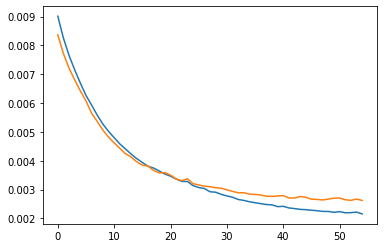

In [69]:
plt.plot(train_loss_history[5:])
plt.plot(test_loss_history[5:])

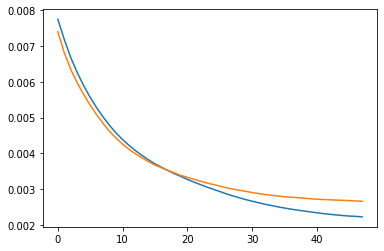

In [70]:
avg_loss_train = moving_average(train_loss_history)
avg_loss_test = moving_average(test_loss_history)
plt.plot(avg_loss_train[3:])
plt.plot(avg_loss_test[3:])

In [37]:
pred = neural_net.forward(X_validation)
pred = pred.data.cpu().numpy()
y_val = Y_validation.data.cpu().numpy()
print('Predicted\nReal value\nDifference\n')
sum_alpha1 = 0.0
sum_alpha2 = 0.0
for i in range(300):
    print(pred[i],'\n',y_val[i],'\n',abs(pred[i]-y_val[i]),'\n')
    
    sum_alpha1 += abs(pred[i][2]-y_val[i][2])
    sum_alpha2 += abs(pred[i][5]-y_val[i][5])
    
    print('alpha1')
    print(pred[i][2]*180/math.pi,'\n',y_val[i][2]*180/math.pi,'\n',abs(pred[i][2]-y_val[i][2])*180/math.pi,'\n')
    print('alpha2')
    print(pred[i][5]*180/math.pi,'\n',y_val[i][5]*180/math.pi,'\n',abs(pred[i][5]-y_val[i][5])*180/math.pi,'\n\n')
    
mean_alpha1 = sum_alpha1/300
mean_alpha2 = sum_alpha2/300

Predicted
Real value
Difference

[ 0.07408515  0.0367072   0.08178431  0.4027899   0.12499197 -1.3696764 ] 
 [ 0.10726304  0.03779847  0.13421439  0.48465306  0.17078708 -1.4794816 ] 
 [0.0331779  0.00109127 0.05243008 0.08186316 0.04579511 0.10980523] 

alpha1
4.685895676316853 
 7.68991788744695 
 3.004022211130097 

alpha2
-78.47667424253376 
 -84.76805027949172 
 6.291376036957955 


[ 0.44977185  0.16722322  0.12392294  0.33783993  0.14197373 -1.4238571 ] 
 [ 0.48142624  0.16964997  0.07932462  0.35686705  0.12575652 -1.3765831 ] 
 [0.03165439 0.00242676 0.04459833 0.01902711 0.01621722 0.04727399] 

alpha1
7.100261679984225 
 4.544965821851041 
 2.555295858133184 

alpha2
-81.58100205049374 
 -78.87240174266596 
 2.7086003078277665 


[ 0.05723432  0.16223979  0.12831765  0.07444088  0.19171032 -1.4538614 ] 
 [ 0.07684998  0.13014574  0.1341849   0.01395303  0.04647167 -1.601973  ] 
 [0.01961567 0.03209405 0.00586724 0.06048785 0.14523865 0.1481117 ] 

alpha1
7.35206001883133 
 7

 8.174956941166235 

alpha2
-82.86119806700756 
 -81.5287579335323 
 1.3324401334752576 


[ 0.06575799  0.03797144  0.11817899  0.40515774  0.0634822  -1.4340738 ] 
 [ 0.17859693  0.06293584  0.20566028  0.37712514  0.13289528 -1.4973611 ] 
 [0.11283894 0.02496439 0.08748129 0.0280326  0.06941307 0.06328726] 

alpha1
6.771157552563623 
 11.783466261768092 
 5.012308709204469 

alpha2
-82.16637658312051 
 -85.79246937196692 
 3.6260927888464094 


[ 0.42360374  0.20570484  0.17776802  0.19192307  0.11753456 -1.3903255 ] 
 [ 5.2938992e-01  1.8655191e-01  1.3491601e-01  3.0192176e-02
  3.3877813e-04 -1.5832568e+00] 
 [0.10578617 0.01915292 0.04285201 0.16173089 0.11719579 0.1929313 ] 

alpha1
10.185357382788727 
 7.730117819580706 
 2.4552395632080213 

alpha2
-79.65978595018504 
 -90.71393485766292 
 11.054148907477886 


[ 0.45588878  0.19481158  0.14226535  0.3070354   0.10511836 -1.3996927 ] 
 [ 0.4740177   0.16703929  0.0766122   0.27195725  0.09583513 -1.6495612 ] 
 [0.01812893 0.0

 7.903539737701915 


[ 0.44438055  0.19930646  0.15883726  0.2776875   0.10293862 -1.3888887 ] 
 [ 0.60624635  0.21363539  0.2474469   0.45991573  0.16206989 -1.4308298 ] 
 [0.1618658  0.01432893 0.08860964 0.18222824 0.05913126 0.04194105] 

alpha1
9.100704559570485 
 14.177662716816418 
 5.076958157245933 

alpha2
-79.57746168011887 
 -81.98050664523694 
 2.403044965118076 


[ 0.01469597  0.06006012  0.13821568  0.3153754   0.10499684 -1.4127971 ] 
 [ 0.03768804  0.10153501  0.09606755  0.4212196   0.14843373 -1.4700007 ] 
 [0.02299207 0.04147489 0.04214813 0.1058442  0.04343689 0.05720365] 

alpha1
7.91917489448572 
 5.504265037005686 
 2.4149098574800347 

alpha2
-80.94731075967829 
 -84.22483850461144 
 3.2775277449331486 


[ 0.39676958  0.11010944  0.07935998  0.46018943  0.10243104 -1.4196938 ] 
 [ 0.34385744  0.12117206  0.11769124  0.45491275  0.16030689 -1.308434  ] 
 [0.05291215 0.01106261 0.03833126 0.00527668 0.05787584 0.11125982] 

alpha1
4.5469918267135965 
 6.743211

 -85.61618218948888 
 2.9618705524410096 


[ 0.4238523   0.15638176  0.14332569  0.28154635  0.11477782 -1.439194  ] 
 [ 0.34077185  0.12008473  0.20368385  0.16872409  0.05945675 -1.3001729 ] 
 [0.08308044 0.03629702 0.06035817 0.11282226 0.05532107 0.13902104] 

alpha1
8.21195692967384 
 11.670225140423867 
 3.458268210750026 

alpha2
-82.45974003816173 
 -74.49442123941704 
 7.96531879874468 


[ 0.01359367  0.12026178  0.13822559  0.26667705  0.11495973 -1.4477051 ] 
 [ 0.09348409  0.21309787  0.12458864  0.2580048   0.09091841 -1.3699138 ] 
 [0.07989042 0.09283609 0.01363695 0.00867224 0.02404132 0.07779133] 

alpha1
7.919742653960477 
 7.138403163856869 
 0.7813394901036087 

alpha2
-82.94739505433311 
 -78.49027997936044 
 4.457115074972691 


[ 0.4207751   0.1485509   0.14920431  0.28125617  0.11920194 -1.4475706 ] 
 [ 0.3462518   0.12201581  0.1924752   0.18296742  0.06447596 -1.2841079 ] 
 [0.0745233  0.02653509 0.04327089 0.09828874 0.05472598 0.16346264] 

alpha1
8.5487774

 -80.35039320735419 
 3.072355692455136 


[ 0.4183751   0.18307626  0.17597532  0.22493313  0.11255494 -1.4241823 ] 
 [ 0.36710376  0.12936383  0.10980324  0.12713546  0.04480132 -1.6306971 ] 
 [0.05127135 0.05371243 0.06617208 0.09779768 0.06775362 0.20651484] 

alpha1
10.082643290502784 
 6.291262485063004 
 3.791380805439779 

alpha2
-81.59963480654953 
 -93.43206327938286 
 11.83242847283333 


[ 0.44017324  0.19370532  0.1613457   0.25683016  0.12342276 -1.4180435 ] 
 [ 0.44502968  0.15682419  0.04933662  0.12496193  0.04403539 -1.5447841 ] 
 [0.00485644 0.03688113 0.11200909 0.13186821 0.07938738 0.12674057] 

alpha1
9.244427961406831 
 2.8267800828287353 
 6.417647878578096 

alpha2
-81.24790738505055 
 -88.5096074162572 
 7.261700031206646 


[ 0.40798995  0.14137146  0.14251418  0.25582933  0.12705606 -1.4564613 ] 
 [ 0.31302768  0.11030795  0.1173922   0.13273478  0.04677446 -1.5055115 ] 
 [0.09496227 0.03106351 0.02512199 0.12309456 0.0802816  0.04905021] 

alpha1
8.1654612

In [38]:
print('mean_alpha1 = ',mean_alpha1*180/math.pi)
print('mean_alpha2 = ',mean_alpha2*180/math.pi)

mean_alpha1 =  3.88235791986588
mean_alpha2 =  5.323332574571238


In [16]:
print(Y_validation)

tensor([[ 0.1073,  0.0378,  0.1342,  0.4847,  0.1708, -1.4795],
        [ 0.4814,  0.1696,  0.0793,  0.3569,  0.1258, -1.3766],
        [ 0.0768,  0.1301,  0.1342,  0.0140,  0.0465, -1.6020],
        ...,
        [ 0.3799,  0.1339,  0.0521,  0.2846,  0.1003, -1.5242],
        [ 0.2231,  0.0786,  0.1784,  0.5281,  0.1861, -1.3284],
        [ 0.2981,  0.1050,  0.1247,  0.6182,  0.2179, -1.4061]])


In [17]:
print(abs((pred-Y_validation).data.cpu().numpy()))

TypeError: rsub() received an invalid combination of arguments - got (Tensor, numpy.ndarray), but expected one of:
 * (Tensor input, Tensor other, Number alpha)
 * (Tensor input, Number other, Number alpha)
